In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

#importing the necessary libraries

### Importing the Bitcoin dataset

In [2]:
bitcoin_df = pd.read_csv('coin_Bitcoin.csv')
bitcoin_df

#importing Bitcoin dataset

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [3]:
bitcoin_updated_df = pd.read_csv(''"BITCOIN PRICE_ REMAINING.csv")          #importing a separate Bitcoin dataset from Yahoo Finance with data from 7 Jul 2021 till 24 Nov 2022
bitcoin_updated_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-07,34225.679688,34997.664063,33839.289063,33855.328125,33855.328125,24796027477
1,2021-07-08,33889.605469,33907.906250,32133.183594,32877.371094,32877.371094,29910396946
2,2021-07-09,32861.671875,34042.292969,32318.880859,33798.011719,33798.011719,27436021028
3,2021-07-10,33811.242188,34209.070313,33116.011719,33520.519531,33520.519531,22971873468
4,2021-07-11,33509.078125,34584.703125,33346.738281,34240.187500,34240.187500,20108729370


In [4]:
bitcoin_df = pd.concat([bitcoin_df,bitcoin_updated_df], axis = 0)
bitcoin_df      

#updating the bitcoin dataset so that we have data all the way till 24 Nov 2022 (considered to be current day)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Adj Close
0,1.0,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,NaN
1,2.0,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,NaN
2,3.0,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,NaN
3,4.0,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,NaN
4,5.0,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,2022-11-20,16746.779297,16248.692383,16712.919922,16291.832031,2.131338e+10,NaN,16291.832031
502,NaN,NaN,NaN,2022-11-21,16291.223633,15599.046875,16291.223633,15787.284180,3.742949e+10,NaN,15787.284180
503,NaN,NaN,NaN,2022-11-22,16253.047852,15656.606445,15782.300781,16189.769531,3.072683e+10,NaN,16189.769531
504,NaN,NaN,NaN,2022-11-23,16638.193359,16170.502930,16195.588867,16610.707031,3.295888e+10,NaN,16610.707031


### Checking for null values

In [5]:
bitcoin_df.isnull().sum()

#checking for null values. Null values are all in columns which we are not using, hence we can ignore them.

SNo           506
Name          506
Symbol        506
Date            0
High            0
Low             0
Open            0
Close           0
Volume          0
Marketcap     506
Adj Close    2991
dtype: int64

### Checking for duplicated data

In [6]:
bitcoin_df.duplicated().sum()

#checking for duplicate data

0

### Converting Date column into datetime 

In [7]:
import datetime as dt

In [8]:
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])



In [9]:
bitcoin_df['Date'] = bitcoin_df['Date'].dt.date


In [10]:
bitcoin_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Adj Close
0,1.0,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,NaN
1,2.0,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,NaN
2,3.0,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,NaN
3,4.0,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,NaN
4,5.0,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,NaN


### Visualizing the historical Bitcoin price

Text(0, 0.5, 'Price in USD')

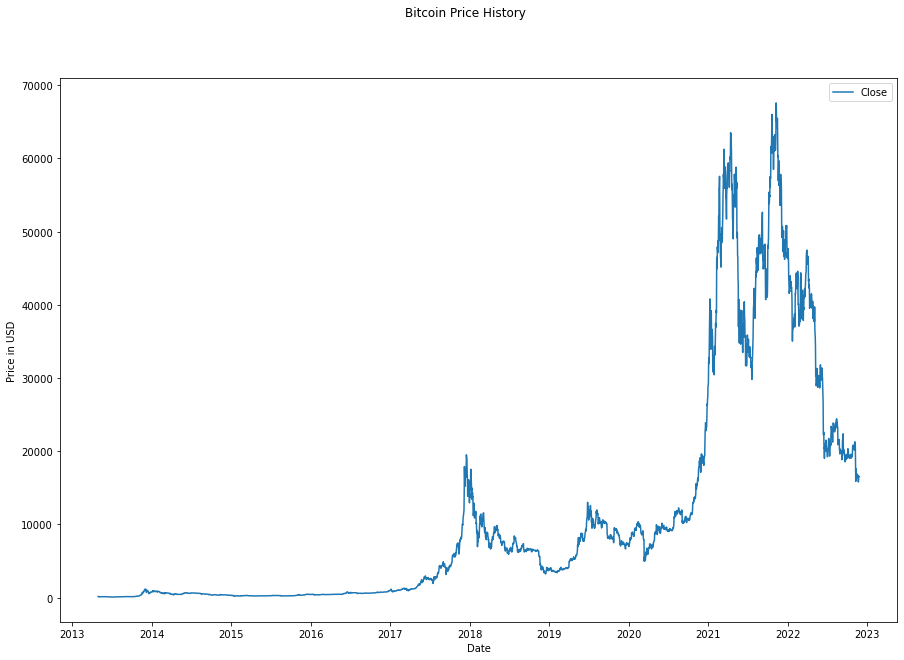

In [11]:
fig1,ax = plt.subplots(figsize = (15,10))
fig1.suptitle('Bitcoin Price History')
bitcoin_df.plot(x='Date',y='Close', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price in USD')

### Split data into training and test set

In [12]:
closing_prices_btc = bitcoin_df['Close'].values    #extracting the values of the closing prices into a series
training_data_len = math.ceil(len(closing_prices_btc)*0.8) #calculating the size of the training data (80% of data to be used)

In [13]:
training_data_len       #original dataframe had 3497 rows, 80% of the data would consist of 2798 rows (rounded up)

2798

In [14]:
closing_prices_btc = closing_prices_btc.reshape(-1,1)

In [15]:
scaler = MinMaxScaler()
scaled_prices_btc = scaler.fit_transform(closing_prices_btc.reshape(-1,1))     #normalizing the closing price data as data does not follow a Gaussian distribution
training_data = scaled_prices_btc[0:training_data_len,:]                       #80% of the scaled closing price data to be used as the training data

X_train = []
Y_train = []

for i in range(60,len(training_data)):
    X_train.append(training_data[i-60:i,0])     #x_train data consists of the prices of the past 60 days
    Y_train.append(training_data[i,0])          #y_train data (label data) consists of the prices of the next corresponding 60 days


X_train, Y_train = np.array(X_train), np.array(Y_train)         #converting the data into numpy array for Tensorflow to accept the data


In [16]:
X_train.shape               #x_train should have (2798-60) rows of data since it contains the previous 60 days of data.

(2738, 60)

In [17]:
Y_train.shape

(2738,)

In [18]:
X_train = np.reshape(X_train, (2738,60,1))      #reshaping X_train data into a 3D array to train LSTM model.

In [19]:
test_data = scaled_prices_btc[training_data_len-60:,:]

X_test = []
Y_test = closing_prices_btc[training_data_len:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i,0])     
    

X_test, Y_test = np.array(X_test), np.array(Y_test)

#Doing the same for the test set

In [20]:
X_test.shape

(699, 60)

In [21]:
Y_test.shape

(699, 1)

In [22]:
X_test = np.reshape(X_test, (699,60,1))

### Setting up LSTM network

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import LSTM
from keras.models import Sequential

#importing the necessary libraries

In [24]:
model = keras.Sequential()      #sequential model is used as we are working with sequential data and we are trying to predict future sequential data
model.add(LSTM(150, return_sequences = True, input_shape = (60,1)))
model.add(LSTM(150, return_sequences = False))
model.add(layers.Dense(30))
model.add(layers.Dense(1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 150)           91200     
                                                                 
 lstm_1 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 30)                4530      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 276,361
Trainable params: 276,361
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [41]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, Y_train, batch_size =1, epochs=3)               #training the model by looking at 1 data point at a time and running the model through the data 3 times

Epoch 1/3
2738/2738 [==============================] - 97s 34ms/step - loss: 6.5279e-05
Epoch 2/3
2738/2738 [==============================] - 102s 37ms/step - loss: 5.4878e-05
Epoch 3/3
2738/2738 [==============================] - 95s 35ms/step - loss: 5.0851e-05


### Predicting BTC prices and comparing with Y_test data using RMSE


In [42]:
from sklearn.metrics import mean_squared_error

predicted_price = model.predict(X_test)
predicted_price_unscaled = scaler.inverse_transform(predicted_price)
RMSE = np.sqrt(mean_squared_error(Y_test, predicted_price_unscaled))
RMSE

22/22 [==============================] - 3s 56ms/step


1703.7551709170973

In [27]:
bitcoin_df['Close'].mean()

11020.740580776035

### Visualizing the predicted prices vs actual prices

C:\Users\USER\AppData\Local\Temp\ipykernel_17936\1633001857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predicted_price_unscaled


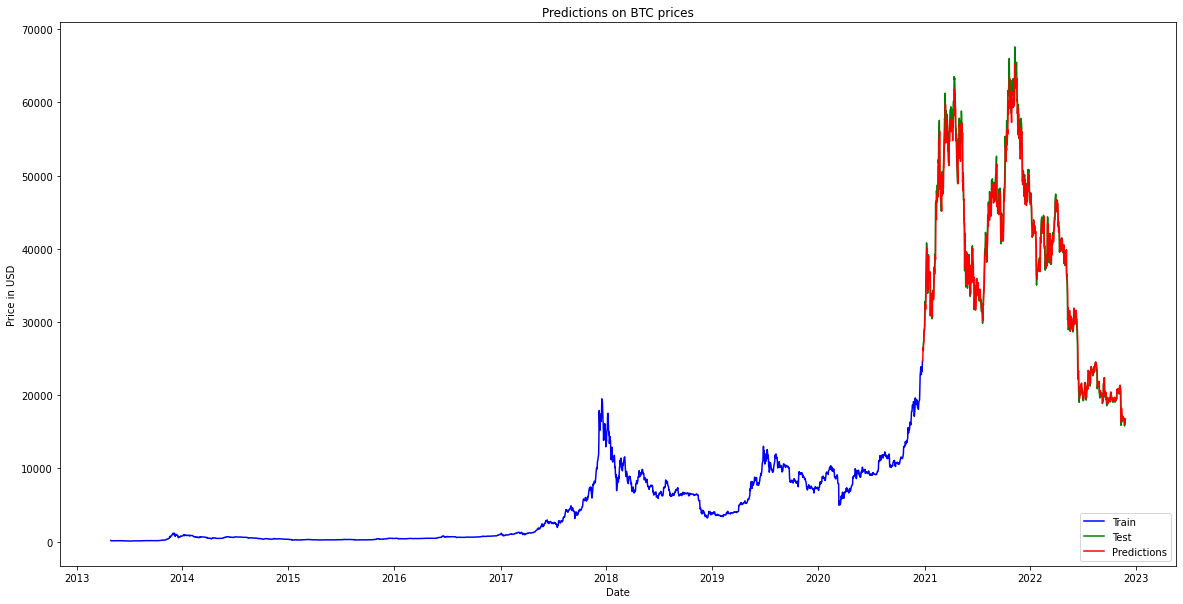

In [43]:
bitcoin_prices = bitcoin_df[['Date','Close']]
train = bitcoin_prices[:training_data_len]
test = bitcoin_prices[training_data_len:]
test['Predictions'] = predicted_price_unscaled
fig,ax = plt.subplots(figsize=(20,10))
ax.set_title('Predictions on BTC prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price in USD')
train.plot(x='Date',y='Close',ax=ax, color = 'b')
test.plot(x='Date',y = 'Close',ax=ax, color = 'g')
test.plot(x='Date',y='Predictions',ax=ax, color = 'r')
ax.legend(['Train','Test','Predictions'],loc = 4)
plt.show()


In [44]:
test   #predicted price vs actual price

,Date,Close,Predictions
2798,2020-12-26,26437.037509,24749.839844
2799,2020-12-27,26272.294567,26460.271484
2800,2020-12-28,27084.807886,26107.644531
2801,2020-12-29,27362.436557,27073.417969
2802,2020-12-30,28840.953420,27277.058594
...,...,...,...
501,2022-11-20,16291.832031,16868.865234
502,2022-11-21,15787.284180,16445.240234
503,2022-11-22,16189.769531,15984.750000
504,2022-11-23,16610.707031,16410.593750


### Predicting prices beyond the present day (24 Nov 2022)

In [45]:
len(Y_test)

699

In [46]:
last_60days = Y_test[639:]
last_60days = last_60days.reshape(1,-1)

#extracting the most recent 60 days worth of data starting from 24 Nov 2022 (present day)

In [47]:
last_60days_list = list(last_60days)


#compiling the most recent 60 days data into a list

In [48]:
last_60days.shape

(1, 60)

In [49]:
last_60days_list = last_60days_list[0].tolist()

In [35]:
last_60days_list

[19222.671875,
 19110.546875,
 19426.720703,
 19573.050781,
 19431.789063,
 19312.095703,
 19044.107422,
 19623.580078,
 20336.84375,
 20160.716797,
 19955.443359,
 19546.849609,
 19416.568359,
 19446.425781,
 19141.484375,
 19051.417969,
 19157.445313,
 19382.904297,
 19185.65625,
 19067.634766,
 19268.09375,
 19550.757813,
 19334.416016,
 19139.535156,
 19053.740234,
 19172.46875,
 19208.189453,
 19567.007813,
 19345.572266,
 20095.857422,
 20770.441406,
 20285.835938,
 20595.351563,
 20818.476563,
 20635.603516,
 20495.773438,
 20485.273438,
 20159.503906,
 20209.988281,
 21147.230469,
 21282.691406,
 20926.486328,
 20602.816406,
 18541.271484,
 15880.780273,
 17586.771484,
 17034.292969,
 16799.185547,
 16353.365234,
 16618.199219,
 16884.613281,
 16669.439453,
 16687.517578,
 16697.777344,
 16711.546875,
 16291.832031,
 15787.28418,
 16189.769531,
 16610.707031,
 16548.230469]

In [55]:
#creating a moving 60 days window whereby the predicted price for days after 24 Noc 2022 is used as the label data to predict the subsequent days ahead.


predicted_output = []           #an empty list to store all the predicted prices past 24 Nov 2022
back_days = 60
i=0

while (i<187):                  #we are trying to predict the prices each day for the next 187 days up till 1 June 2023

    if len(last_60days_list)> 60:                                #this part runs after the price on 25 Nov 2022 is predicted and appended to last_60days_list
        last_60days = np.array(last_60days_list[1:])             #taking the most recent 60 days data. In the first iteration of the loop, the predicted price of 25 Nov 2022 is taken as the 1st data point and 60 days is counted backwards from there
        last_60days = last_60days.reshape(1,-1)
        last_60days = last_60days.reshape((1,back_days,1))
        future_predict = model.predict(last_60days,verbose=0)
        last_60days_list.extend(future_predict[0].tolist())      #predicting future prices and appending it to the last_60days_list
        last_60days_list = last_60days_list[1:]                  #moving the 60 days window 1 day forward for every iteration of the loop
        predicted_output.extend(future_predict.tolist())         #appending the predictions to predicted_output list
        i=i+1
    else:
        last_60days = last_60days.reshape((1,back_days,1))          #the else part of the while loop will run first, since len(last_60days_list) = 60. This part predicts the price on 25 Nov 2022, the first day after 24 Nov 2022 which is when the real world data ends
        future_predict = model.predict(last_60days,verbose=0)
        last_60days_list.extend(future_predict[0].tolist())         #appending the predicted price of 25 Nov 2022 to the last 60 days price data.
        predicted_output.extend(future_predict.tolist())            #adding the predicted price of 25 Nov 2022 to the predicted_output list
        i=i+1


print(predicted_output)
    

[[0.5800566673278809], [0.5800021290779114], [0.5799489617347717], [0.5798971056938171], [0.5798465609550476], [0.5797971487045288], [0.5797490477561951], [0.5797020792961121], [0.5796563029289246], [0.579611599445343], [0.5795679688453674], [0.5795254111289978], [0.5794839859008789], [0.5794435739517212], [0.5794041156768799], [0.5793656706809998], [0.5793281197547913], [0.5792914628982544], [0.5792558193206787], [0.5792210102081299], [0.5791870951652527], [0.5791539549827576], [0.5791216492652893], [0.5790901780128479], [0.579059362411499], [0.5790293216705322], [0.5790000557899475], [0.5789715647697449], [0.5789437294006348], [0.578916609287262], [0.5788900852203369], [0.5788642168045044], [0.5788390040397644], [0.5788145065307617], [0.5787904858589172], [0.5787670612335205], [0.5787442326545715], [0.5787219405174255], [0.5787002444267273], [0.578679084777832], [0.578658401966095], [0.5786381959915161], [0.5786185264587402], [0.5785993337631226], [0.5785806179046631], [0.57856225967

In [56]:
predicted_output_unscaled = scaler.inverse_transform(predicted_output)

In [57]:
btc_futures_df = pd.DataFrame({'Date': pd.date_range('2022-11-25','2023-05-30')})
btc_futures_df['Predicted Price'] = predicted_output_unscaled

#constructing a dataframe to store the predicted data from 25 Nov 2022 to 30 May 2023


### Visualizing the predicted data outside of the timeframe of real world data

Text(0, 0.5, 'Price in USD')

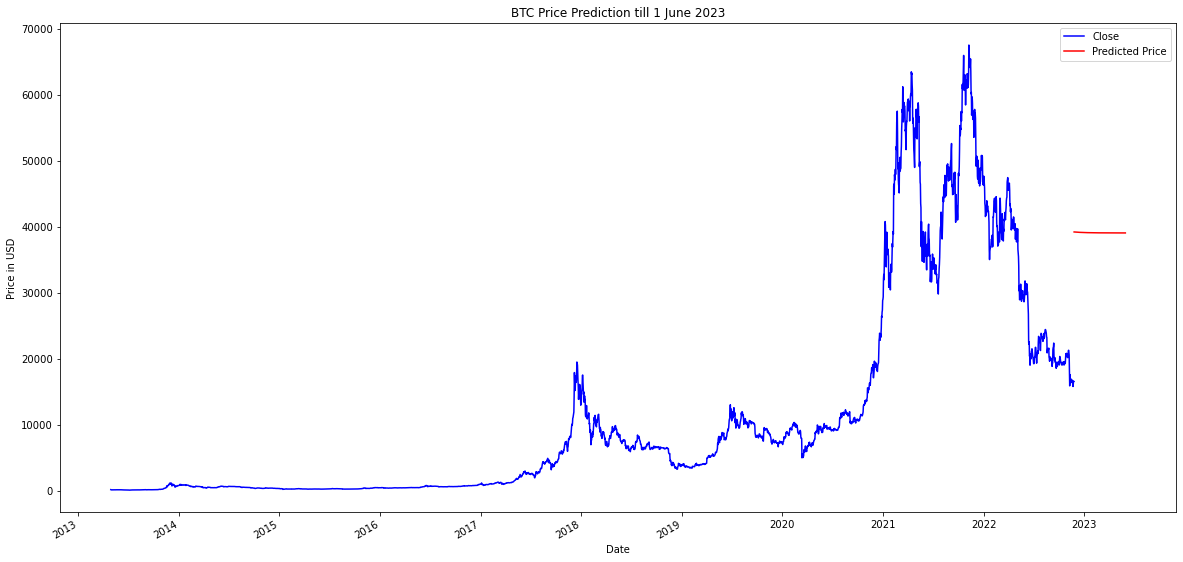

In [58]:
fig2,ax = plt.subplots(figsize = (20,10))
bitcoin_df.plot(x='Date',y='Close', color = 'blue',ax=ax)
btc_futures_df.plot(x='Date',y='Predicted Price',color='r', ax=ax)
x=['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']
labels = ['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']
ax.set_xticks(x,labels)
fig2.set_facecolor('White')
ax.set_title('BTC Price Prediction till 1 June 2023')
ax.set_ylabel('Price in USD')

In [54]:
predicted_output_unscaled

array([[206357.79051281],
       [ 76844.11130913],
       [ 92032.40291195],
       [ 92342.18265024],
       [ 90933.00227289],
       [ 89431.33616052],
       [ 88126.38126825],
       [ 87254.14760941],
       [ 86703.51390331],
       [ 86134.3331623 ],
       [ 84944.85267259],
       [ 82561.98112529],
       [ 79006.32544291],
       [ 74901.63729519],
       [ 70922.67470945],
       [ 67443.95904778],
       [ 64563.72120048],
       [ 62232.46351669],
       [ 60348.01637572],
       [ 58806.58880002],
       [ 57522.50233943],
       [ 56430.93088256],
       [ 55484.5292002 ],
       [ 54649.11200913],
       [ 53900.05319208],
       [ 53219.59426487],
       [ 52594.89713891],
       [ 52016.63599491],
       [ 51477.91101404],
       [ 50973.54431475],
       [ 50499.52877193],
       [ 50052.73029877],
       [ 49630.59415184],
       [ 49230.97997919],
       [ 48852.0733095 ],
       [ 48492.30911097],
       [ 48150.30339662],
       [ 47824.82103854],
       [ 475